Data preprocessing


In [1]:
import re
import os
import pandas as pd
from os import listdir
from os.path import isfile, join
pd.set_option('mode.chained_assignment',  None)
pd.set_option("display.max_rows", 100)

# 폰트 설정 방법 1
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

['NanumGothic']


In [4]:
# # 2017_KBO_df

# os.chdir("C://Users//nhw85//KBO_crawler//data//2020")
# merged_df = pd.DataFrame()
# for data_file in os.listdir():
#     if not data_file.endswith('.csv'):
#         continue

#     abspath = os.path.abspath(data_file)
#     prp_df = pd.read_csv(abspath, encoding='cp949', on_bad_lines='skip')
#     prp_df
    
#     df = prp_df
#     df = df[~df['pitch_result'].isna()]
#     df['previous_pitch_result'] = df['pitch_result'].shift(1)
#     df['is_sequence_start'] = (df['pitcher_ID'] != df['pitcher_ID'].shift(1)) | (df['batter_ID'] != df['batter_ID'].shift(1))

#     df['sequence_id'] = df['is_sequence_start'].cumsum()
    
#     merged_sequences = df.groupby(['sequence_id'])['pitch_result']
#     merged_sequences.agg(lambda x: " ".join(x))
    
#     new_df = pd.merge(df.drop_duplicates('sequence_id', keep = 'last'), merged_sequences.agg(lambda x: " ".join(x)), on='sequence_id')
#     new_df
    
#     # itch_result_x	pa_result	pa_result_detail	previous_pitch_result	is_sequence_start	sequence_id	pitch_result_y
#     prp_df = new_df[['gameID','pitcher','batter', 'pitcher_ID','batter_ID', 'pitch_result_x', 'pa_result', 'pa_result_detail','pitch_result_y', 'sequence_id']]
#     prp_df
    
    
#     if os.path.basename(abspath):
#         merged_df = pd.concat([merged_df, prp_df], axis = 0, ignore_index=True)
#         merged_df.to_csv('2020'+'_' + "KBO_total" + '.csv', encoding = 'utf-8')

In [2]:
df_2017 = pd.read_csv("C://Users//nhw85//KBO_crawler//data//2017//2017_KBO_total.csv", index_col=0)
len(df_2017[df_2017['batter_ID'].isna()==True]) # batter_ID가 NAN 값인 사람 삭제 필요 108개

nan_batter_ID = df_2017[df_2017['batter_ID'].isna()==True]
df_2017 = df_2017.drop(nan_batter_ID.index, axis = 0)
df_2017['batter_ID'] = df_2017['batter_ID'].astype('int')
df_2017

,gameID,pitcher,batter,pitcher_ID,batter_ID,pitch_result_x,pa_result,pa_result_detail,pitch_result_y,sequence_id
0,20170331HHOB02017,니퍼트,김원석,61240,62768,타격,안타,안타,타격,1
1,20170331HHOB02017,니퍼트,장민석,61240,71347,타격,희생번트,희생번트,타격,2
2,20170331HHOB02017,니퍼트,김태균,61240,71752,볼,볼넷,볼넷,볼 볼 파울 볼 볼,3
3,20170331HHOB02017,니퍼트,로사리오,61240,66740,타격,필드 아웃,라인드라이브 아웃,헛스윙 헛스윙 타격,4
4,20170331HHOB02017,비야누에바,민병헌,67742,76249,헛스윙,삼진,삼진,볼 볼 스트라이크 헛스윙 파울 헛스윙,5
...,...,...,...,...,...,...,...,...,...,...
57187,20171003WOSS02017,장필준,고종욱,77927,61353,스트라이크,삼진,삼진,스트라이크 스트라이크 스트라이크,82
57188,20171003WOSS02017,장필준,김웅빈,77927,65898,타격,안타,안타,볼 타격,83
57189,20171003WOSS02017,장필준,임병욱,77927,64346,타격,안타,안타,파울 볼 볼 헛스윙 볼 타격,84
57190,20171003WOSS02017,장필준,김하성,77927,64300,타격,안타,안타,볼 스트라이크 볼 헛스윙 볼 타격,85


In [3]:
df_2018 = pd.read_csv("C://Users//nhw85//KBO_crawler//data//2018//2018_KBO_total.csv", index_col=0)
# len(df_2018[df_2018['batter_ID'].isna()==True]) # batter_ID가 NAN 값인 사람 삭제 필요 0개
# len(df_2018[df_2018['pitcher_ID'].isna()==True]) # pitcher_ID가 NAN 값인 사람 삭제 필요 0개

df_2018['batter_ID'] = df_2018['batter_ID'].astype('int')
df_2018

,gameID,pitcher,batter,pitcher_ID,batter_ID,pitch_result_x,pa_result,pa_result_detail,pitch_result_y,sequence_id
0,20180324HHWO02018,로저스,이용규,65742,74163,스트라이크,삼진,삼진,헛스윙 스트라이크 스트라이크,1
1,20180324HHWO02018,로저스,양성우,65742,62797,타격,필드 아웃,플라이 아웃,볼 볼 스트라이크 타격,2
2,20180324HHWO02018,로저스,송광민,65742,76753,타격,안타,안타,타격,3
3,20180324HHWO02018,로저스,김태균,65742,71752,타격,안타,안타,볼 볼 타격,4
4,20180324HHWO02018,로저스,하주석,65742,62700,타격,안타,안타,볼 헛스윙 헛스윙 타격,5
...,...,...,...,...,...,...,...,...,...,...
57047,20181014OBLT02018,장시환,전민재,77318,68205,타격,필드 아웃,플라이 아웃,타격,67
57048,20181014OBLT02018,김승회,김문호,73248,76509,타격,필드 아웃,플라이 아웃,스트라이크 타격,68
57049,20181014OBLT02018,김승회,정훈,73248,60523,타격,필드 아웃,라인드라이브 아웃,스트라이크 파울 볼 타격,69
57050,20181014OBLT02018,김승회,전병우,73248,65586,타격,2루타,2루타,타격,70


In [4]:
df_2019 = pd.read_csv("C://Users//nhw85//KBO_crawler//data//2019//2019_KBO_total.csv", index_col=0)
# len(df_2019[df_2019['batter_ID'].isna()==True]) # batter_ID가 NAN 값인 사람 삭제 필요 67개
# len(df_2018[df_2019['pitcher_ID'].isna()==True]) # pitcher_ID가 NAN 값인 사람 삭제 필요 1개

nan_batter_ID = df_2019[df_2019['batter_ID'].isna()==True]
nan_pitcher_ID = df_2019[df_2019['pitcher_ID'].isna()==True]

df_2019 = df_2019.drop(nan_batter_ID.index, axis = 0)
df_2019 = df_2019.drop(nan_pitcher_ID.index, axis = 0)

df_2019['batter_ID'] = df_2019['batter_ID'].astype('int')
df_2019['pitcher_ID'] = df_2019['pitcher_ID'].astype('int')
df_2019

,gameID,pitcher,batter,pitcher_ID,batter_ID,pitch_result_x,pa_result,pa_result_detail,pitch_result_y,sequence_id
0,20190323HHOB02019,린드블럼,정근우,65543,75808,타격,내야안타,내야안타,스트라이크 헛스윙 볼 타격,1
1,20190323HHOB02019,린드블럼,송광민,65543,76753,타격,필드 아웃,파울 플라이 아웃,타격,2
2,20190323HHOB02019,린드블럼,호잉,65543,68730,타격,안타,안타,헛스윙 스트라이크 볼 볼 타격,3
3,20190323HHOB02019,린드블럼,김태균,65543,71752,타격,안타,안타,볼 파울 볼 타격,4
4,20190323HHOB02019,린드블럼,이성열,65543,73136,타격,포스 아웃,땅볼 아웃,볼 타격,5
...,...,...,...,...,...,...,...,...,...,...
55812,20191001WOLT02019,손승락,송성문,75321,65357,타격,필드 아웃,라인드라이브 아웃,타격,71
55813,20191001WOLT02019,손승락,김하성,75321,64300,타격,포스 아웃,땅볼 아웃,볼 타격,72
55814,20191001WOLT02019,조상우,정보근,63342,68518,타격,필드 아웃,플라이 아웃,볼 파울 볼 파울 파울 파울 볼 타격,73
55815,20191001WOLT02019,조상우,김문호,63342,76509,헛스윙,삼진,삼진,스트라이크 헛스윙 볼 파울 헛스윙,74


In [5]:
df_2020 = pd.read_csv("C://Users//nhw85//KBO_crawler//data//2020//2020_KBO_total.csv", index_col=0)
# len(df_2020[df_2020['batter_ID'].isna()==True]) # batter_ID가 NAN 값인 사람 삭제 필요 9개
# len(df_2020[df_2020['pitcher_ID'].isna()==True]) # pitcher_ID가 NAN 값인 사람 삭제 필요 11개

nan_batter_ID = df_2020[df_2020['batter_ID'].isna()==True]
nan_pitcher_ID = df_2020[df_2020['pitcher_ID'].isna()==True]
nan_pitcher_ID

df_2020 = df_2020.drop(nan_pitcher_ID.index, axis = 0)


df_2020['batter_ID'] = df_2020['batter_ID'].astype('int')
df_2020['pitcher_ID'] = df_2020['pitcher_ID'].astype('int')
df_2020

,gameID,pitcher,batter,pitcher_ID,batter_ID,pitch_result_x,pa_result,pa_result_detail,pitch_result_y,sequence_id
0,20200505HHSK02020,킹엄,이용규,50815,74163,타격,포스 아웃,땅볼 아웃,볼 스트라이크 볼 스트라이크 파울 타격,1
1,20200505HHSK02020,킹엄,정은원,50815,68743,타격,2루타,2루타,스트라이크 스트라이크 파울 타격,2
2,20200505HHSK02020,킹엄,호잉,50815,68730,타격,필드 아웃,플라이 아웃,볼 타격,3
3,20200505HHSK02020,킹엄,이성열,50815,73136,헛스윙,삼진,낫아웃 삼진,스트라이크 스트라이크 헛스윙,4
4,20200505HHSK02020,서폴드,노수광,69744,63704,타격,포스 아웃,땅볼 아웃,볼 스트라이크 스트라이크 타격,5
...,...,...,...,...,...,...,...,...,...,...
508,20200506LTKT02020,이대은,이대호,67008,71564,타격,필드 아웃,파울 플라이 아웃,파울 볼 타격,76
509,20200506LTKT02020,이대은,안치홍,67008,79608,타격,포스 아웃,땅볼 아웃,볼 파울 파울 파울 타격,77
510,20200506LTKT02020,구승민,배정대,63543,64166,타격,필드 아웃,플라이 아웃,타격,78
511,20200506LTKT02020,구승민,심우준,63543,64006,타격,포스 아웃,땅볼 아웃,스트라이크 볼 타격,79


In [6]:
# # final file 만들기
# os.chdir("C://Users//nhw85//KBO_crawler//data//final")
# df_2017.to_csv('2017'+'_' + "KBO_final" + '.csv', encoding = 'utf-8')
# df_2018.to_csv('2018'+'_' + "KBO_final" + '.csv', encoding = 'utf-8')
# df_2019.to_csv('2019'+'_' + "KBO_final" + '.csv', encoding = 'utf-8')
# df_2020.to_csv('2020'+'_' + "KBO_final" + '.csv', encoding = 'utf-8')

# batter_pitcher_2vec

In [7]:
data_directory = "C://Users//nhw85//KBO_crawler//data//final"

In [8]:
import re

from os import listdir
from os.path import isfile, join

data_files = [f for f in listdir(data_directory) if isfile(join(data_directory, f))]
at_bats = {}
home_runs = {}
singles = {}
doubles = {}
triples = {}
counts = {"batter": {}, "pitcher": {}}

data = {}
train_years = ["2017", "2018", "2019",]
test_year = "2020"
for year in train_years + [test_year]:
    data[year] = []
# year_match = r"20(17|18|19|20)"
year_match = r"20\d\d"


In [9]:
pitcher_result = {"볼", "스트라이크", "삼진", '볼넷', '몸에 맞는 볼'}
batter_result = {'헛스윙', '파울', '번트파울', '번트 헛스윙', '안타', '희생번트', '필드 아웃', '포스 아웃', '2루타', '희생플라이', '내야안타', '홈런', '3루타', '병살타', '고의4구', '타구맞음 아웃', '번트 안타', '낫아웃 출루', '야수 선택', '삼중살', '안타', '희생번트', '라인드라이브 아웃', '플라이 아웃', '땅볼 아웃', '2루타', '파울 플라이 아웃', '희생플라이', '번트 아웃', '낫아웃 삼진', '내야안타', '홈런', '3루타', '병살타', '고의4구', '인필드 플라이', '타구맞음 아웃', '번트 안타', '낫아웃 폭투', '희생번트 실책', '야수 선택', '낫아웃 포일', '쓰리번트 삼진', '희생번트 야수선택', '낫아웃 다른 주자 포스 아웃', '삼중살'}

In [10]:
os.chdir('C://Users//nhw85//KBO_crawler//data//final')

In [11]:
data_files[:4]

['2017_KBO_final.csv',
 '2018_KBO_final.csv',
 '2019_KBO_final.csv',
 '2020_KBO_final.csv']

In [12]:
test_df2 = pd.read_csv(data_files[0], index_col=0)
test_df2[(test_df2['batter_ID'] == 76249) & (test_df2['pitcher_ID'] == 67742)]

,gameID,pitcher,batter,pitcher_ID,batter_ID,pitch_result_x,pa_result,pa_result_detail,pitch_result_y,sequence_id
4,20170331HHOB02017,비야누에바,민병헌,67742,76249,헛스윙,삼진,삼진,볼 볼 스트라이크 헛스윙 파울 헛스윙,5
19,20170331HHOB02017,비야누에바,민병헌,67742,76249,타격,희생플라이,희생플라이,볼 볼 스트라이크 헛스윙 타격,20
40,20170331HHOB02017,비야누에바,민병헌,67742,76249,헛스윙,삼진,낫아웃 삼진,볼 파울 스트라이크 헛스윙,41


In [13]:
import string

for data_file in data_files:
    year_re = re.search(year_match, data_file)
    # if year_re is None:
    #     continue
    year = year_re.group()
        
    # Skip non-event files.
    if not (".csv" in data_file):
        continue
    
    f = open(join(data_directory, data_file))
    pitcher = None
    line = f.readline().strip() 

    while line != "":
        parts = line.split(",")
        
        # Get starting pitchers.
        if parts[1] == "gameID":
            while parts[-1] != "":
                line = f.readline().strip()
                if not line:
                    break
                parts = line.split(",")
            
                pitcher = parts[4]
            
                batter = parts[5]

                outcome = ""
                play = ''
                # Handle balks, intentional, walks, hit by a pitch,
                # strike outs, and walks..
                
                _ini_history:str = parts[-2]
                ini_history:list = _ini_history.split()
                
                if ini_history:
                    for idx, ball_count in enumerate(ini_history):
                        play = ''
                        if '볼' in ball_count:
                            play = 'B'

                        elif '스트라이크' in ball_count:
                            play = 'S'

                        elif '삼진' in ball_count:
                            play = 'SO'

                        elif '볼넷' in ball_count:
                            play = 'BB'
                    
                        elif '몸에 맞는 볼' in ball_count:
                            play = "HBP"
                            
                        elif '파울' in ball_count:
                            play = "F"
                        
                        if play:
                            outcome += f"p_{play} "
                            continue
                        
                        if "타격" in ball_count or "헛스윙" in ball_count:
                            # play = parts[-5] +'-'+ "".join(parts[-4].split()) +'-'+ "".join(parts[-3].split())
                            # play =  parts[-5] +'-'+ parts[-4] +'-'+ parts[-3]
                            if idx+1 == len(ini_history):
                                play = parts[-5] +'-'+ "".join(parts[-4].split()) +'-'+ "".join(parts[-3].split())
                                if "홈런" in play:
                                    play = "홈런"
                                elif "안타" in play:
                                    play = '안타'
                                elif "2루타" in play:
                                    play = "2루타"
                                elif "3루타" in play:
                                    play = '3루타'
                                
                                    
                                if play == '홈런':
                                    home_runs[batter] = home_runs.get(batter, 0) + 1
                                elif play == '안타':
                                    singles[batter] = singles.get(batter, 0) + 1
                                elif play == '2루타':
                                    doubles[batter] = doubles.get(batter, 0) + 1
                                elif play == '3루타':
                                    triples[batter] = triples.get(batter, 0) + 1
                            
                            elif "헛스윙" in ball_count:
                                    play = '헛스윙'    
                            
                            if play:
                                outcome += f"h_{play} " 
                                
                            
                        
                            
                        
                outcome = outcome.strip()  

                    
                # Ignore catcher interference and ambiguous singles.
                if not '실책' in outcome and outcome != "":
                    data[year].append({"batter": batter, "pitcher": pitcher, "outcome": outcome})
                    at_bats[batter] = at_bats.get(batter, 0) + 1
                    counts["batter"][batter] = counts["batter"].get(batter, 0) + 1
                    counts["pitcher"][pitcher] = counts["pitcher"].get(pitcher, 0) + 1
        
                line = f.readline().strip()
            
            f.close()

In [14]:
print(data_files)

['2017_KBO_final.csv', '2018_KBO_final.csv', '2019_KBO_final.csv', '2020_KBO_final.csv']


In [15]:
cutoffs = {}
percentile_cutoff = 0.9
for player_type in ["batter", "pitcher"]:
    counts_list = list(counts[player_type].values())
    counts_list.sort(reverse = True)
    total_at_bats = sum(counts_list)

    cumulative_percentage = [sum(counts_list[:i + 1]) / total_at_bats for i in range(len(counts_list))]
    cutoff_index = sum([1 for total in cumulative_percentage if total <= percentile_cutoff])

    cutoff = counts_list[cutoff_index]
    cutoffs[player_type] = cutoff
    print("Original: {0}\tNew: {1}\tProportion: {2:.2f}".format(
            len(counts[player_type]), cutoff_index, cutoff_index / len(counts[player_type])))

Original: 466	New: 182	Proportion: 0.39
Original: 473	New: 232	Proportion: 0.49


In [16]:
final_data = []
original_data = 0
matchups = set()
for year in train_years:

    original_data += len(data[year])

    for sample in data[year]:

        batter = sample["batter"]
        pitcher = sample["pitcher"]
        matchups.add("{0}_{1}".format(batter, pitcher))
        # print(matchups)
        if counts["batter"][batter] >= cutoffs["batter"] and counts["pitcher"][pitcher] >= cutoffs["pitcher"]:
            final_data.append(sample)



print("Original: {0}\tReduced: {1}".format(original_data, len(final_data)))
print("{0:.2f}% of original data set.".format(len(final_data) / original_data))

Original: 84155	Reduced: 70383
0.84% of original data set.


In [17]:
import random

FAV_NUM = 2010
random.seed(FAV_NUM)
random.shuffle(final_data)

categories = {"batter": set(), "pitcher": set(), "outcome": set()}
for sample in final_data:
    categories["batter"].add(sample["batter"])
    categories["pitcher"].add(sample["pitcher"])
    categories["outcome"].add(sample["outcome"])

for column in categories:
    categories[column] = list(categories[column])
    categories[column].sort()

NUM_OUTCOMES = len(categories["outcome"])
print("NUM_OUTCOMES: {0}".format(NUM_OUTCOMES))
print(" ".join(categories["outcome"]))

category_to_int = {}
for column in categories:
    category_to_int[column] = {categories[column][i]: i for i in range(len(categories[column]))}

NUM_OUTCOMES: 7453
h_2루타 h_3루타 h_안타 h_타격-병살타-병살타 h_타격-야수선택-야수선택 h_타격-야수선택-희생번트야수선택 h_타격-타구맞음아웃-타구맞음아웃 h_타격-포스아웃-땅볼아웃 h_타격-필드아웃-라인드라이브아웃 h_타격-필드아웃-번트아웃 h_타격-필드아웃-인필드플라이 h_타격-필드아웃-파울플라이아웃 h_타격-필드아웃-플라이아웃 h_타격-희생번트-희생번트 h_타격-희생플라이-희생플라이 h_헛스윙 h_2루타 h_헛스윙 h_3루타 h_헛스윙 h_안타 h_헛스윙 h_타격-병살타-병살타 h_헛스윙 h_타격-포스아웃-땅볼아웃 h_헛스윙 h_타격-필드아웃-라인드라이브아웃 h_헛스윙 h_타격-필드아웃-번트아웃 h_헛스윙 h_타격-필드아웃-인필드플라이 h_헛스윙 h_타격-필드아웃-파울플라이아웃 h_헛스윙 h_타격-필드아웃-플라이아웃 h_헛스윙 h_타격-희생번트-희생번트 h_헛스윙 h_타격-희생플라이-희생플라이 h_헛스윙 h_헛스윙 h_2루타 h_헛스윙 h_헛스윙 h_안타 h_헛스윙 h_헛스윙 h_타격-병살타-병살타 h_헛스윙 h_헛스윙 h_타격-포스아웃-땅볼아웃 h_헛스윙 h_헛스윙 h_타격-필드아웃-파울플라이아웃 h_헛스윙 h_헛스윙 h_타격-필드아웃-플라이아웃 h_헛스윙 h_헛스윙 h_헛스윙-삼진-낫아웃삼진 h_헛스윙 h_헛스윙 h_헛스윙-삼진-삼진 h_헛스윙 h_헛스윙 h_홈런 h_헛스윙 h_헛스윙 p_B h_헛스윙 h_헛스윙 p_B h_2루타 h_헛스윙 h_헛스윙 p_B h_3루타 h_헛스윙 h_헛스윙 p_B h_안타 h_헛스윙 h_헛스윙 p_B h_타격-포스아웃-땅볼아웃 h_헛스윙 h_헛스윙 p_B h_타격-필드아웃-파울플라이아웃 h_헛스윙 h_헛스윙 p_B h_타격-필드아웃-플라이아웃 h_헛스윙 h_헛스윙 p_B h_헛스윙-삼진-낫아웃삼진 h_헛스윙 h_헛스윙 p_B h_헛스윙-삼진-삼진 h_헛스윙 h_헛스윙 p_B p_B h_헛스윙 h_헛스윙 p_B p_B h_2루타 h_헛스윙 h_헛스윙 p_B p_B h_안타 h_헛스윙 h_헛스윙

100%|██████████| 3/3 [00:00<00:00, 15.23it/s]


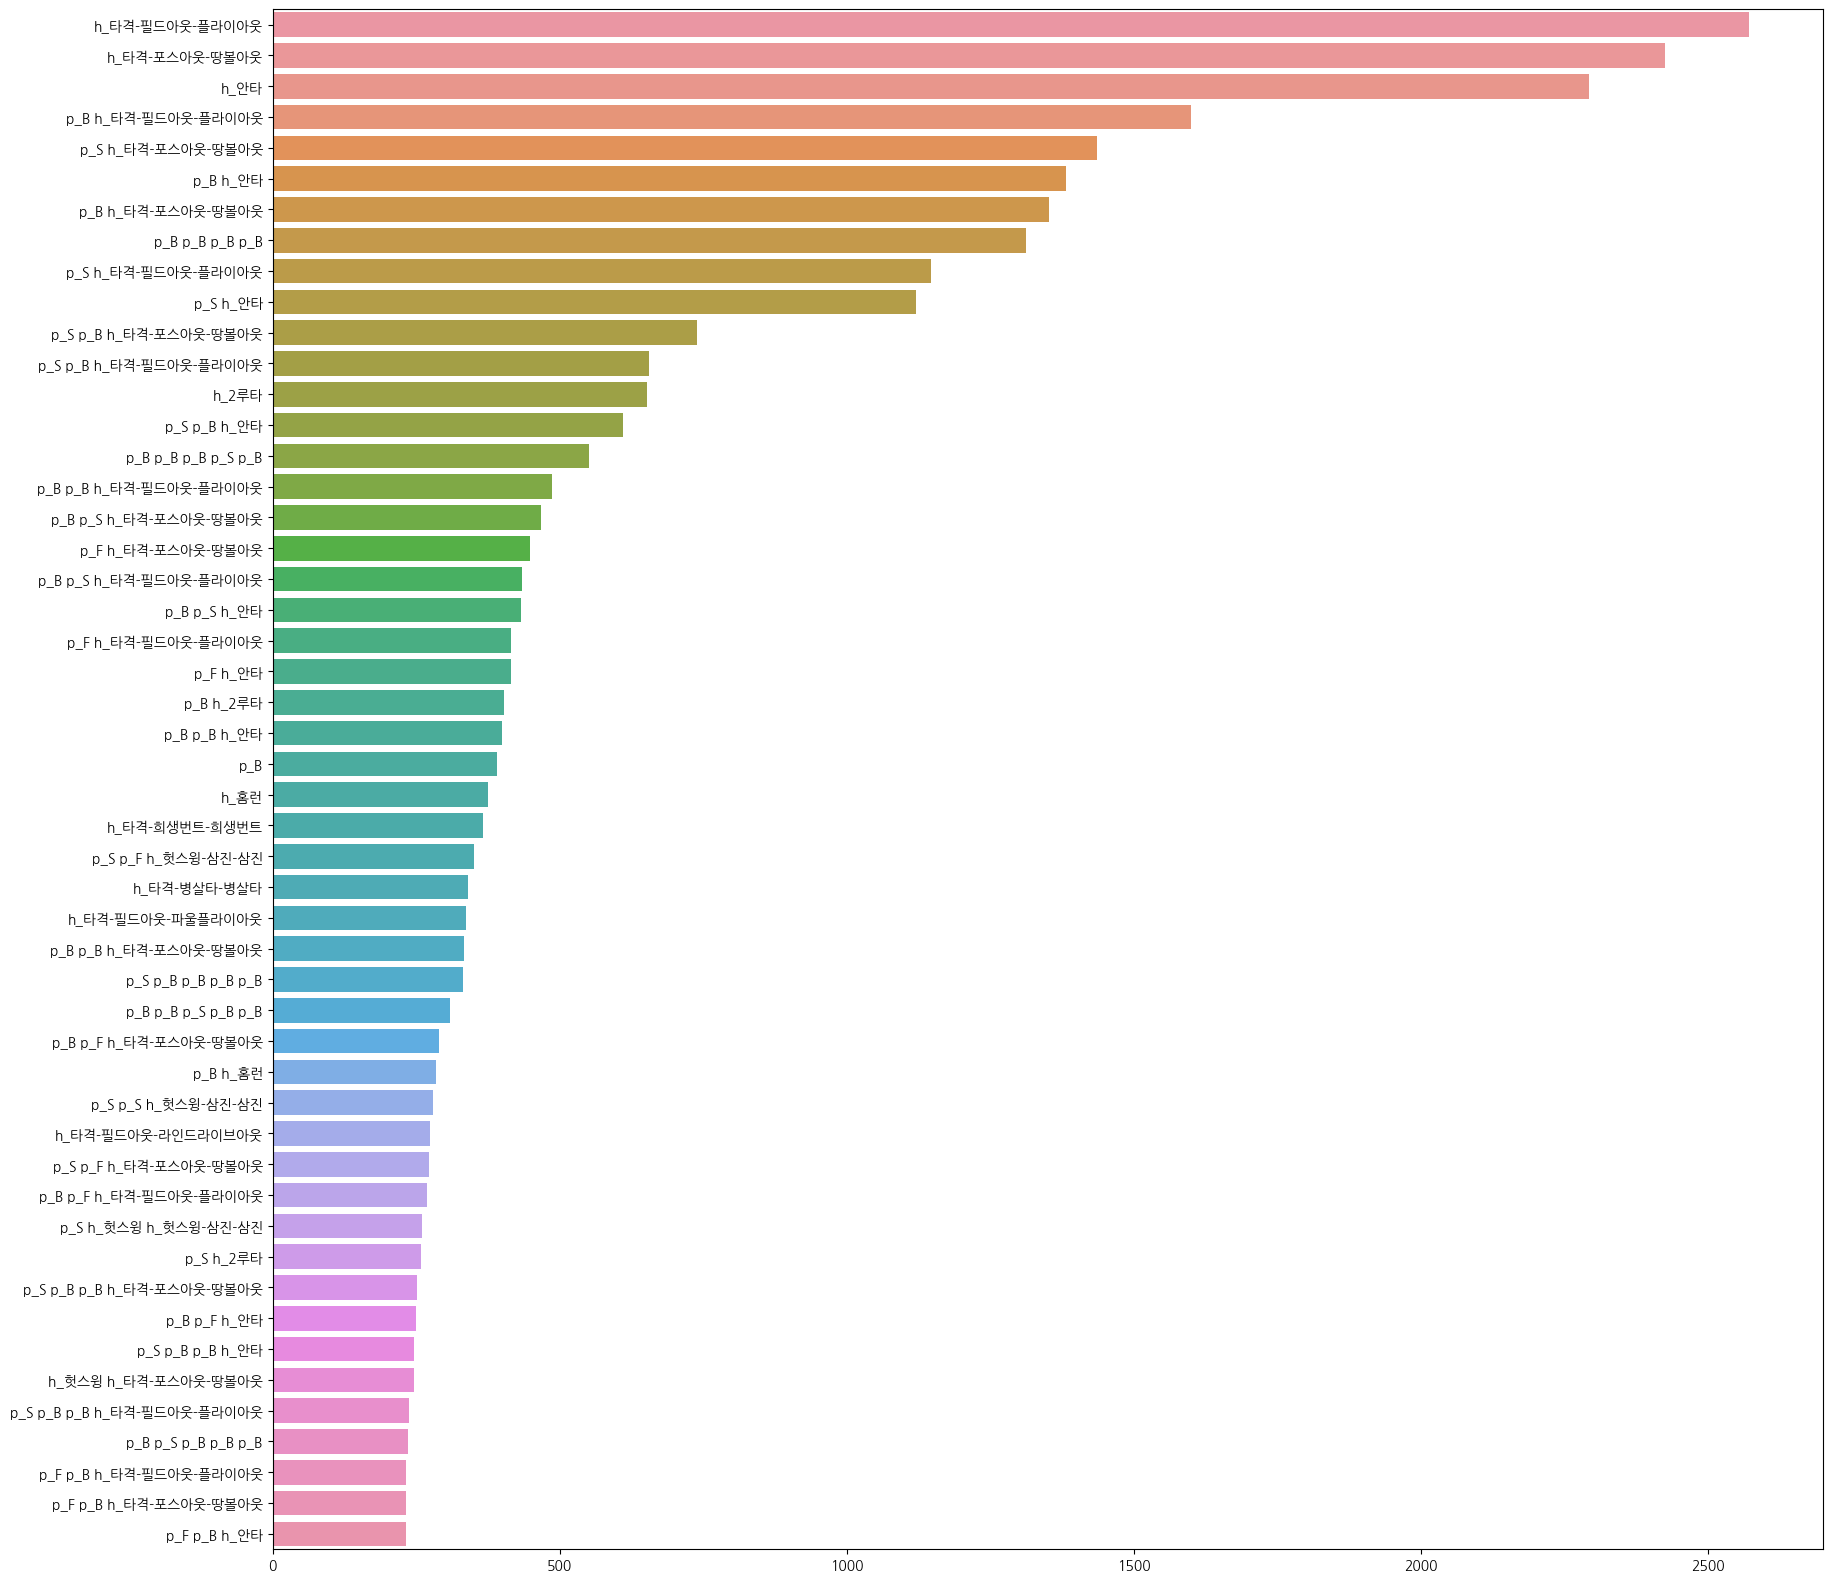

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

outcome_counts = {}
for year in tqdm(train_years):
    for sample in tqdm(data[year]):
        outcome = sample["outcome"]
        outcome_counts[outcome] = outcome_counts.get(outcome, 0) + 1 # 한 개의 상황에 대해서 몇 개가 생길지

outcome_counts = list(outcome_counts.items())
outcome_counts.sort(key = lambda x: x[1], reverse = True)
val = [x[1] for x in outcome_counts[:50]] # 개수 
symbols = [x[0] for x in outcome_counts[:50]] # outcome 
pos = range(len(outcome_counts[:50]))

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
ax = sns.barplot(x = val, y = symbols)
plt.show()

In [23]:
for sample in final_data[:3]:
    for column in sample:
        value = sample[column]
        print(value)


71752
62528
p_B h_타격-포스아웃-땅볼아웃
64610
65856
h_안타
78122
67645
p_S h_타격-희생번트-희생번트


In [24]:
final_data[:3]

[{'batter': '71752', 'pitcher': '62528', 'outcome': 'p_B h_타격-포스아웃-땅볼아웃'},
 {'batter': '64610', 'pitcher': '65856', 'outcome': 'h_안타'},
 {'batter': '78122', 'pitcher': '67645', 'outcome': 'p_S h_타격-희생번트-희생번트'}]

In [25]:
import numpy as np

np.random.seed(FAV_NUM)

from keras.utils import np_utils

data_sets = {"batter": [], "pitcher": [], "outcome": []}
for sample in final_data:
    for column in sample: # batter, pitcher, outcome
        value = sample[column] # 74339, 69861, p_B p_S p_B p_F p_B p_B
        value_index = category_to_int[column][value]
        data_sets[column].append([value_index])

for column in ["batter", "pitcher"]:
    data_sets[column] = np.array(data_sets[column])

data_sets["outcome"] = np_utils.to_categorical(np.array(data_sets["outcome"]), NUM_OUTCOMES) # 원- 핫 인코딩 수행, "num_outcomes"는 전체 가능한 결과의 수를 나타내는 변수

In [26]:
# data_sets["outcome"][:1]

#### Building and Training the Model

- We're now ready to build our model with Keras. The model is similar in spirit to the word2vec model in that we're trying to learn the player vectors that best predict the outcome of an at-bat (the "target word" in word2vec) given a certain batter and pitcher (the "context" in word2vec). We'll learn separate embedding matrices for batters and pitchers.

In [27]:
from keras import optimizers
from keras.layers import Activation, concatenate, Dense, Dropout, Embedding, Input, Reshape
from keras.models import Model

NUM_BATTERS = len(categories["batter"])
NUM_PITCHERS = len(categories["pitcher"])
VEC_SIZE = 9
ACTIVATION = "sigmoid"

batter_idx = Input(shape = (1, ), dtype = "int32", name = "batter_idx")
batter_embed = Embedding(NUM_BATTERS, VEC_SIZE, input_length = 1)(batter_idx)
batter_embed = Reshape((VEC_SIZE, ), name = "batter_embed")(batter_embed)
batter_embed = Activation(ACTIVATION)(batter_embed)

pitcher_idx = Input(shape = (1, ), dtype = "int32", name = "pitcher_idx")
pitcher_embed = Embedding(NUM_PITCHERS, VEC_SIZE, input_length = 1)(pitcher_idx)
pitcher_embed = Reshape((VEC_SIZE, ), name = "pitcher_embed")(pitcher_embed)
pitcher_embed = Activation(ACTIVATION)(pitcher_embed)

batter_pitcher = concatenate([batter_embed, pitcher_embed], name = "batter_pitcher")

output = Dense(NUM_OUTCOMES, activation = "softmax")(batter_pitcher)

model = Model(inputs = [batter_idx, pitcher_idx], outputs = [output])
sgd = optimizers.SGD(learning_rate = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = "categorical_crossentropy")

And now we're ready to train our model. We'll save the weights at the end of training.

In [28]:
BATCH_SIZE = 100
NUM_EPOCHS = 100
VALID = False
validation_split = 0.0
callbacks = None
if VALID:
    from keras.callbacks import ModelCheckpoint
    validation_split = 0.01 # 비율을 0.2로 주었을 때 loss 값이 8.xx 부터 시작을 함
    callbacks = [ModelCheckpoint("weights.h5", save_best_only = True, save_weights_only = True)] # weights.h5 파일에 가장 좋은 성능을 보인 모델의 가중치를 저장하는 형태로 설정

X_list = [data_sets["batter"], data_sets["pitcher"]]
y = data_sets["outcome"]
history = model.fit(X_list, y, epochs = NUM_EPOCHS, batch_size = BATCH_SIZE,
                    verbose = 2, shuffle = True, callbacks = callbacks, validation_split = validation_split)
if not VALID:
    model.save_weights("weights.h5")

model.load_weights("weights.h5")
if VALID:
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc = "upper right")
    plt.show()

Epoch 1/100
704/704 - 10s - loss: 8.1429 - 10s/epoch - 15ms/step
Epoch 2/100
704/704 - 9s - loss: 7.5448 - 9s/epoch - 13ms/step
Epoch 3/100
704/704 - 7s - loss: 7.3504 - 7s/epoch - 10ms/step
Epoch 4/100
704/704 - 7s - loss: 7.2437 - 7s/epoch - 10ms/step
Epoch 5/100
704/704 - 7s - loss: 7.1762 - 7s/epoch - 10ms/step
Epoch 6/100
704/704 - 7s - loss: 7.1289 - 7s/epoch - 10ms/step
Epoch 7/100
704/704 - 7s - loss: 7.0938 - 7s/epoch - 10ms/step
Epoch 8/100
704/704 - 7s - loss: 7.0665 - 7s/epoch - 10ms/step
Epoch 9/100
704/704 - 7s - loss: 7.0445 - 7s/epoch - 10ms/step
Epoch 10/100
704/704 - 7s - loss: 7.0264 - 7s/epoch - 11ms/step
Epoch 11/100
704/704 - 9s - loss: 7.0115 - 9s/epoch - 13ms/step
Epoch 12/100
704/704 - 17s - loss: 6.9988 - 17s/epoch - 24ms/step
Epoch 13/100
704/704 - 21s - loss: 6.9878 - 21s/epoch - 30ms/step
Epoch 14/100
704/704 - 16s - loss: 6.9785 - 16s/epoch - 22ms/step
Epoch 15/100
704/704 - 14s - loss: 6.9703 - 14s/epoch - 20ms/step
Epoch 16/100
704/704 - 13s - loss: 6.96

#### sgd로 optimizer를 했을 경우
- 최종: 
Epoch 100/100
704/704 - 8s - loss: 6.8714 - 8s/epoch - 11ms/step

In [29]:
# optimizer(Adam)

from keras import optimizers
from keras.layers import Activation, concatenate, Dense, Dropout, Embedding, Input, Reshape
from keras.models import Model

NUM_BATTERS = len(categories["batter"])
NUM_PITCHERS = len(categories["pitcher"])
VEC_SIZE = 9
ACTIVATION = "sigmoid"

batter_idx = Input(shape = (1, ), dtype = "int32", name = "batter_idx")
batter_embed = Embedding(NUM_BATTERS, VEC_SIZE, input_length = 1)(batter_idx)
batter_embed = Reshape((VEC_SIZE, ), name = "batter_embed")(batter_embed)
batter_embed = Activation(ACTIVATION)(batter_embed)

pitcher_idx = Input(shape = (1, ), dtype = "int32", name = "pitcher_idx")
pitcher_embed = Embedding(NUM_PITCHERS, VEC_SIZE, input_length = 1)(pitcher_idx)
pitcher_embed = Reshape((VEC_SIZE, ), name = "pitcher_embed")(pitcher_embed)
pitcher_embed = Activation(ACTIVATION)(pitcher_embed)

batter_pitcher = concatenate([batter_embed, pitcher_embed], name = "batter_pitcher")

output = Dense(NUM_OUTCOMES, activation = "softmax")(batter_pitcher)

model = Model(inputs = [batter_idx, pitcher_idx], outputs = [output])
Adam = optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = Adam, loss = "categorical_crossentropy")

In [30]:
BATCH_SIZE = 100
NUM_EPOCHS = 100
VALID = False
validation_split = 0.0
callbacks = None
if VALID:
    from keras.callbacks import ModelCheckpoint
    validation_split = 0.01 # 비율을 0.2로 주었을 때 loss 값이 8.xx 부터 시작을 함
    callbacks = [ModelCheckpoint("weights.h5", save_best_only = True, save_weights_only = True)] # weights.h5 파일에 가장 좋은 성능을 보인 모델의 가중치를 저장하는 형태로 설정

X_list = [data_sets["batter"], data_sets["pitcher"]]
y = data_sets["outcome"]
history = model.fit(X_list, y, epochs = NUM_EPOCHS, batch_size = BATCH_SIZE,
                    verbose = 2, shuffle = True, callbacks = callbacks, validation_split = validation_split)
if not VALID:
    model.save_weights("weights.h5")

model.load_weights("weights.h5")
if VALID:
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc = "upper right")
    plt.show()

Epoch 1/100
704/704 - 9s - loss: 7.4715 - 9s/epoch - 12ms/step
Epoch 2/100
704/704 - 8s - loss: 6.9195 - 8s/epoch - 11ms/step
Epoch 3/100
704/704 - 8s - loss: 6.9054 - 8s/epoch - 12ms/step
Epoch 4/100
704/704 - 9s - loss: 6.9014 - 9s/epoch - 13ms/step
Epoch 5/100
704/704 - 9s - loss: 6.8995 - 9s/epoch - 13ms/step
Epoch 6/100
704/704 - 9s - loss: 6.8982 - 9s/epoch - 12ms/step
Epoch 7/100
704/704 - 8s - loss: 6.8976 - 8s/epoch - 12ms/step
Epoch 8/100
704/704 - 9s - loss: 6.8968 - 9s/epoch - 12ms/step
Epoch 9/100
704/704 - 10s - loss: 6.8961 - 10s/epoch - 14ms/step
Epoch 10/100
704/704 - 8s - loss: 6.8956 - 8s/epoch - 12ms/step
Epoch 11/100
704/704 - 8s - loss: 6.8951 - 8s/epoch - 11ms/step
Epoch 12/100
704/704 - 9s - loss: 6.8943 - 9s/epoch - 12ms/step
Epoch 13/100
704/704 - 10s - loss: 6.8941 - 10s/epoch - 14ms/step
Epoch 14/100
704/704 - 10s - loss: 6.8932 - 10s/epoch - 15ms/step
Epoch 15/100
704/704 - 9s - loss: 6.8927 - 9s/epoch - 13ms/step
Epoch 16/100
704/704 - 9s - loss: 6.8921 - 